In [1]:
import numpy as np
import pandas as pd
import nltk
from textblob import TextBlob
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
news_df = pd.read_csv('/content/Demo.csv')

In [4]:
news_df.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1.0
1,1,NaN,Did they post their votes for Hillary already?,1.0
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1.0
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0.0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1.0


In [5]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      822 non-null    int64  
 1   title   814 non-null    object 
 2   text    822 non-null    object 
 3   label   819 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 25.8+ KB


In [6]:
news_df['label'] = news_df['label'].fillna(0).astype(int)

In [7]:
news_df

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
817,817,"Can’t Afford Clean Water For Flint, But Israe...","In a showdown with the U.S. government, Israel...",1
818,818,Samantha Bee Rips Tennessee Republican A New ...,"A racist, anti-gay Tennessee Republican who th...",1
819,819,"Samantha Bee Mocks Trump, Roasts Media at ’Not...",(Adult Language Warning) Liberal comedian Sam...,0
820,820,Case Regarding Cruz’s Birthright Citizenship ...,One of the biggest mysteries in Constitutional...,1


In [8]:
news_df.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      822 non-null    int64 
 1   title   814 non-null    object
 2   text    822 non-null    object
 3   label   822 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.8+ KB


In [10]:
news_df.describe()

,id,label
count,822.000000,822.000000
mean,410.500000,0.538929
std,237.435254,0.498786
min,0.000000,0.000000
25%,205.250000,0.000000
50%,410.500000,1.000000
75%,615.750000,1.000000
max,821.000000,1.000000


In [11]:
news_df.isnull().sum()

id       0
title    8
text     0
label    0
dtype: int64

In [12]:
news_df.shape

(822, 4)

In [13]:
news_df = news_df.fillna(' ')

In [14]:
news_df['content'] = news_df['text']+' '+news_df['title']

In [15]:
news_df

,id,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...
1,1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"Now, most of the demonstrators gathered last ..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
...,...,...,...,...,...
817,817,"Can’t Afford Clean Water For Flint, But Israe...","In a showdown with the U.S. government, Israel...",1,"In a showdown with the U.S. government, Israel..."
818,818,Samantha Bee Rips Tennessee Republican A New ...,"A racist, anti-gay Tennessee Republican who th...",1,"A racist, anti-gay Tennessee Republican who th..."
819,819,"Samantha Bee Mocks Trump, Roasts Media at ’Not...",(Adult Language Warning) Liberal comedian Sam...,0,(Adult Language Warning) Liberal comedian Sam...
820,820,Case Regarding Cruz’s Birthright Citizenship ...,One of the biggest mysteries in Constitutional...,1,One of the biggest mysteries in Constitutional...


#predicting sentiment

In [16]:
TextBlob(news_df['content'][0]).sentiment

Sentiment(polarity=0.03464058027582618, subjectivity=0.29682409575852203)

In [17]:
X = news_df.drop('label',axis=1)
y = news_df['label']

In [18]:
def preprocess_text_data(data, text_column_name):
    data[text_column_name] = data[text_column_name].str.lower()

    print(f"Data type of '{text_column_name}' before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])
    data.loc[:, text_column_name] = data[text_column_name].astype(str)
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s😀-🙁]', '', x))
    lemmatizer = WordNetLemmatizer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
    return data

news_df = preprocess_text_data(news_df, 'content')
news_df.head()

Data type of 'content' before handling missing values: object
Number of missing values in 'content' before handling missing values: 0


,id,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...
1,1,,Did they post their votes for Hillary already?,1,did they post their vote for hillary already
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,now most of the demonstrator gathered last nig...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,a dozen politically active pastor came here fo...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,the r sarmat missile dubbed satan will replace...


In [19]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [20]:
news_df['Polarity'] = news_df['content'].apply(find_polarity)

In [21]:
news_df['Label_Sent'] = np.where(news_df['Polarity']>0,'positive','negative')
news_df['Label_Sent'][news_df['Polarity']==0]='Neutral'

<ipython-input-21-337679f7cbc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['Label_Sent'][news_df['Polarity']==0]='Neutral'


In [22]:
news_df.head()

,id,title,text,label,content,Polarity,Label_Sent
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...,0.030069,positive
1,1,,Did they post their votes for Hillary already?,1,did they post their vote for hillary already,0.000000,Neutral
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,now most of the demonstrator gathered last nig...,0.198214,positive
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,a dozen politically active pastor came here fo...,0.116357,positive
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,the r sarmat missile dubbed satan will replace...,0.044808,positive


In [23]:
news_count=news_df.groupby('Label_Sent').count()

In [24]:
news_count

,id,title,text,label,content,Polarity
Label_Sent,,,,,,
Neutral,23,23,23,23,23,23
negative,162,162,162,162,162,162
positive,637,637,637,637,637,637


In [25]:
news_count['Polarity']

Label_Sent
Neutral      23
negative    162
positive    637
Name: Polarity, dtype: int64

In [26]:
neutral_news = (news_count['Polarity'][0] / 822) * 100
negative_news = (news_count['Polarity'][1] / 822) * 100
positive_news = (news_count['Polarity'][2] / 822) * 100

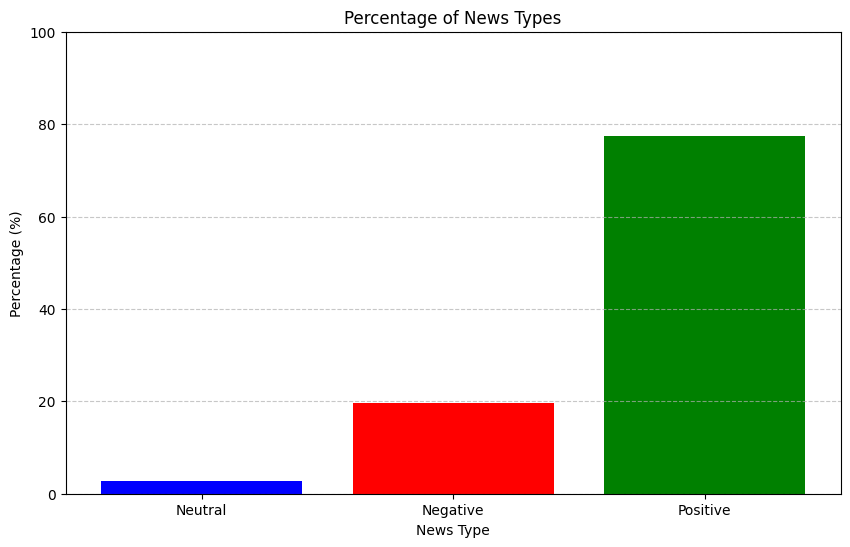

In [27]:
news_types = ['Neutral', 'Negative', 'Positive']
percentages = [neutral_news, negative_news, positive_news]
#bar graph
plt.figure(figsize=(10, 6))
plt.bar(news_types, percentages, color=['blue', 'red', 'green'])
plt.xlabel('News Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of News Types')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

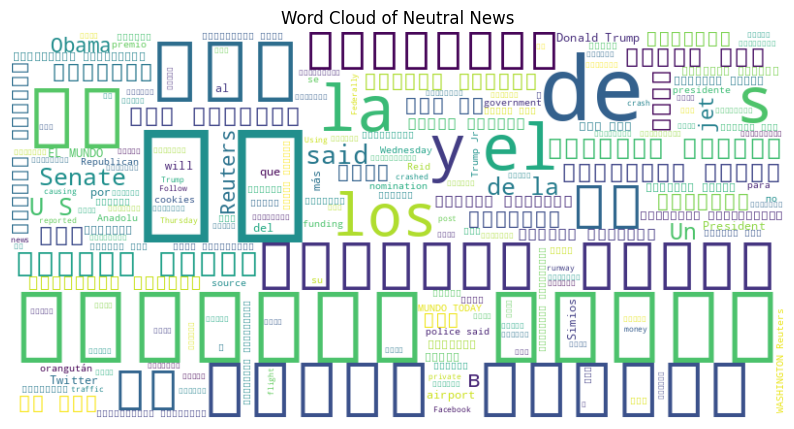

In [28]:
text_combined = ' '.join(news_df[news_df['Label_Sent'] == 'Neutral']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral News')
plt.show()

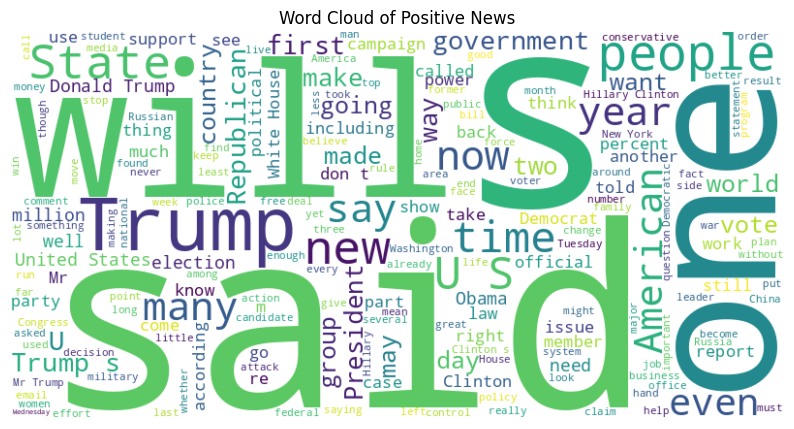

In [29]:
text_combined = ' '.join(news_df[news_df['Label_Sent'] == 'positive']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive News')
plt.show()

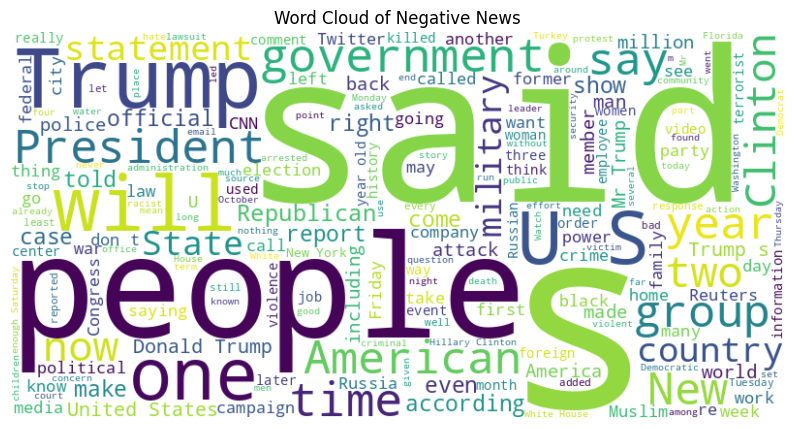

In [30]:
text_combined = ' '.join(news_df[news_df['Label_Sent'] == 'negative']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative News')
plt.show()

In [31]:
X = news_df['content'].values
y = news_df['label'].values

In [32]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [33]:
print(X[1:20])

  (0, 25504)	0.4121883372392499
  (0, 23655)	0.2311486085347471
  (0, 23595)	0.24793313431805156
  (0, 17977)	0.47828259081678554
  (0, 10716)	0.3875315874305582
  (0, 8914)	0.17375971969804185
  (0, 6287)	0.3411588835167958
  (0, 776)	0.435526651764029
  (1, 25858)	0.11860755287174023
  (1, 25333)	0.09065424561475238
  (1, 24614)	0.196668615774206
  (1, 23902)	0.07541345106768048
  (1, 23595)	0.05839053587520932
  (1, 23586)	0.03693501999260173
  (1, 22468)	0.0624674611233503
  (1, 21746)	0.21762670395740494
  (1, 20723)	0.06634692975960305
  (1, 20135)	0.21762670395740494
  (1, 20101)	0.08034605814961236
  (1, 18957)	0.13212748530848756
  (1, 18573)	0.2502979146308631
  (1, 18568)	0.12404166861913576
  (1, 18558)	0.1784546461345442
  (1, 17184)	0.3400519623838866
  (1, 16550)	0.10200901389647653
  :	:
  (18, 3158)	0.026475087147130223
  (18, 3136)	0.03054295653857115
  (18, 2263)	0.053172307492602176
  (18, 2255)	0.0379054106765394
  (18, 2155)	0.03258485790884168
  (18, 2101)	0.0275

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)
X_train.shape

(657, 26547)

In [35]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [36]:
train_y_pred = model.predict(X_train)
print(accuracy_score(train_y_pred,Y_train))

0.969558599695586


In [37]:
testing_y_pred = model.predict(X_test)
print(accuracy_score(testing_y_pred,Y_test))

0.896969696969697


In [38]:
input_data = X_test[8]
prediction = model.predict(input_data)

In [39]:
news_df['content'][6]

'dr ben carson tell the story of what happened when he spoke out against obama dr ben carson targeted by the irs i never had an audit until i spoke at the national prayer breakfast'

In [40]:
if prediction[0] == 0:
    print('The News Is Real')
else:
    print('The News is Fake')

The News is Fake
